In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("Salary_Data.csv")
data.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


(array([4., 2., 5., 4., 3., 2., 2., 2., 3., 3.]),
 array([ 1.1 ,  2.04,  2.98,  3.92,  4.86,  5.8 ,  6.74,  7.68,  8.62,
         9.56, 10.5 ]),
 <a list of 10 Patch objects>)

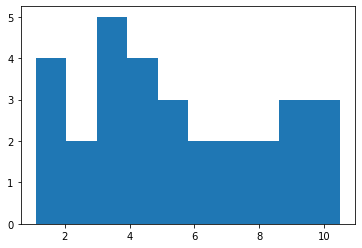

In [6]:
plt.hist(data['YearsExperience'])

{'whiskers': [<matplotlib.lines.Line2D at 0x24fdbcabe08>,
 'caps': [<matplotlib.lines.Line2D at 0x24fdbcb3c08>,
 'boxes': [<matplotlib.lines.Line2D at 0x24fdbc97348>],
 'medians': [<matplotlib.lines.Line2D at 0x24fdbcb3dc8>],
 'fliers': [<matplotlib.lines.Line2D at 0x24fdbcbca88>],
 'means': []}

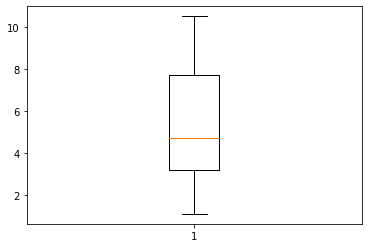

In [9]:
plt.boxplot(data.YearsExperience)

(array([4., 2., 7., 4., 0., 2., 2., 2., 4., 3.]),
 array([ 37731.,  46197.,  54663.,  63129.,  71595.,  80061.,  88527.,
         96993., 105459., 113925., 122391.]),
 <a list of 10 Patch objects>)

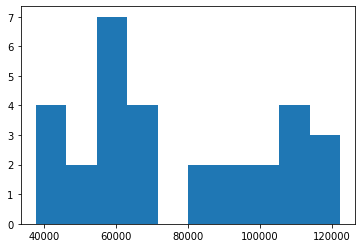

In [11]:
plt.hist(data.Salary)

{'whiskers': [<matplotlib.lines.Line2D at 0x24fdbd1e848>,
 'caps': [<matplotlib.lines.Line2D at 0x24fdbd66208>,
 'boxes': [<matplotlib.lines.Line2D at 0x24fdbaab4c8>],
 'medians': [<matplotlib.lines.Line2D at 0x24fdbd44f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x24f98522708>],
 'means': []}

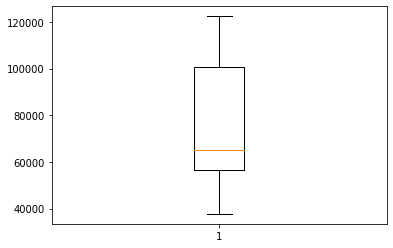

In [12]:
plt.boxplot(data.Salary)

In [22]:
x = data["YearsExperience"].values
y = data["Salary"].values

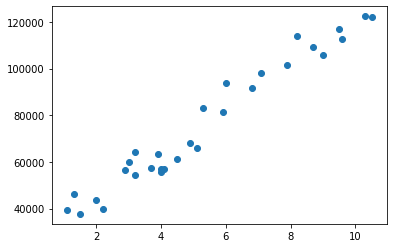

In [23]:
plt.scatter(x,y)

In [32]:
np.corrcoef(x,y)

array([[1.        , 0.97824162],
       [0.97824162, 1.        ]])

In [33]:
import statsmodels.formula.api as smf

In [34]:
# preparing models on transformations
model1 = smf.ols("Salary ~ YearsExperience", data = data).fit()

In [35]:
model1.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

In [36]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 07 Jan 2024   Prob (F-statistic):           1.14e-20
Time:                        15:52:56   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [3]:
# preparing linear model
from sklearn.linear_model import LinearRegression

In [4]:
final_model = LinearRegression()

In [5]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1]

In [ ]:
final_model.fit(x,y)

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2, random_state = 0)

In [9]:
final_model.fit(xtrain,ytrain)

LinearRegression()

In [20]:
y_pred = final_model.predict(xtest)
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

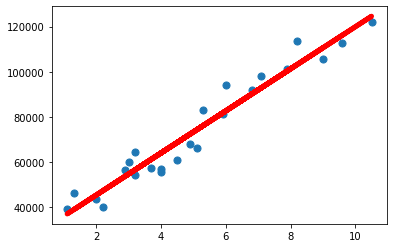

In [19]:
plt.scatter(xtrain,ytrain, s = 50)
plt.plot(xtrain,y_pred, c = 'r', lw = 5)

In [38]:
pred = final_model.predict(x)
pred

array([ 37023.93179003,  38886.44681538,  40748.96184072,  45405.24940409,
        47267.76442943,  53786.56701814,  54717.82453082,  56580.33955616,
        56580.33955616,  61236.62711953,  63099.14214487,  64030.39965754,
        64030.39965754,  64961.65717022,  68686.68722091,  72411.7172716 ,
        74274.23229695,  76136.74732229,  81724.29239833,  82655.549911  ,
        90105.61001239,  92899.38255041, 100349.44265179, 103143.21518981,
       107799.50275317, 110593.27529119, 115249.56285456, 116180.82036723,
       122699.62295594, 124562.13798128])

In [ ]:
# Adjusted R-Squared value

In [32]:
final_model.score(xtrain,ytrain)


0.9411949620562126

In [40]:
rmse = np.sqrt(np.mean((pred-y)**2))
rmse

5611.097802939668

In [34]:
final_model.coef_

array([9312.57512673])

In [35]:
final_model.intercept_

26780.099150628186

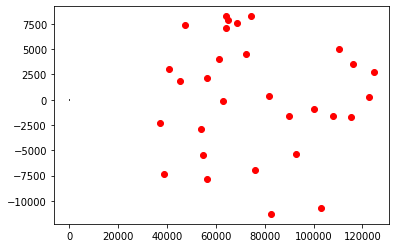

In [41]:
#### Residuals Vs Fitted values
import matplotlib.pyplot as plt
plt.scatter(pred,(pred-y),c="r")
plt.hlines(y=0,xmin=0,xmax=300) 


(array([2., 1., 3., 1., 5., 4., 2., 4., 2., 6.]),
 array([-11284.450089  ,  -9331.4818504 ,  -7378.51361181,  -5425.54537321,
         -3472.57713462,  -1519.60889602,    433.35934257,   2386.32758116,
          4339.29581976,   6292.26405835,   8245.23229695]),
 <a list of 10 Patch objects>)

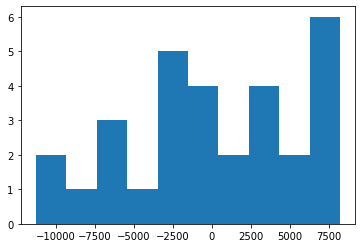

In [42]:
# checking normal distribution for residual
plt.hist(pred-y)